In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Read Dataset
df=pd.read_csv(r'Healthcare.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Patient Category,Age Group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Adult,21-40
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Adult,61-80
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Senior,61-80
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Adult,21-40
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Adult,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Adult,41-60
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,Adult,61-80
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Adult,21-40
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,Adult,41-60


Average Billing Amount for Urgent Admissions: $25517.36


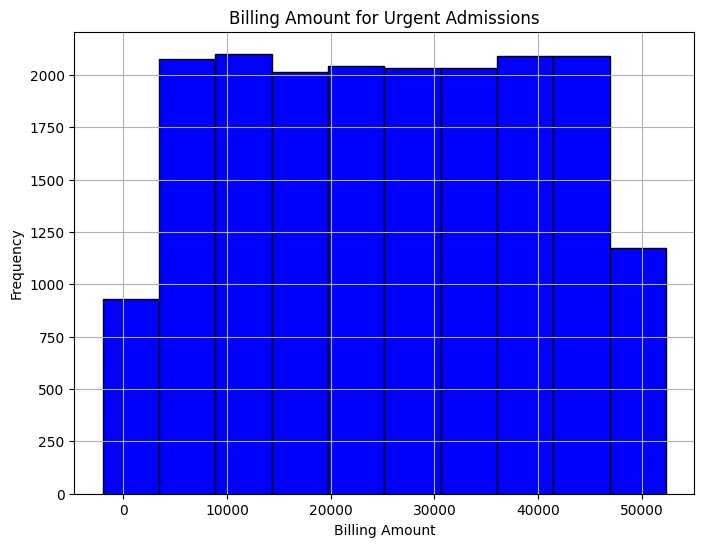

In [6]:
# Filter by admission type
urgent_admissions = df[df['Admission Type'] == 'Urgent']

# Calculate average billing amount for urgent admissions
average_billing_urgent = urgent_admissions['Billing Amount'].mean()
print(f"Average Billing Amount for Urgent Admissions: ${average_billing_urgent:.2f}")

plt.figure(figsize=(8, 6))
plt.hist(urgent_admissions['Billing Amount'], bins=10, color='blue', edgecolor='black')
plt.title('Billing Amount for Urgent Admissions')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Likelihood of being 'Senior' among Cancer patients: 29.37%


C:\Users\Rahul\AppData\Local\Temp\ipykernel_21244\4007068159.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cancer_patients, x='Patient Category', palette='viridis')


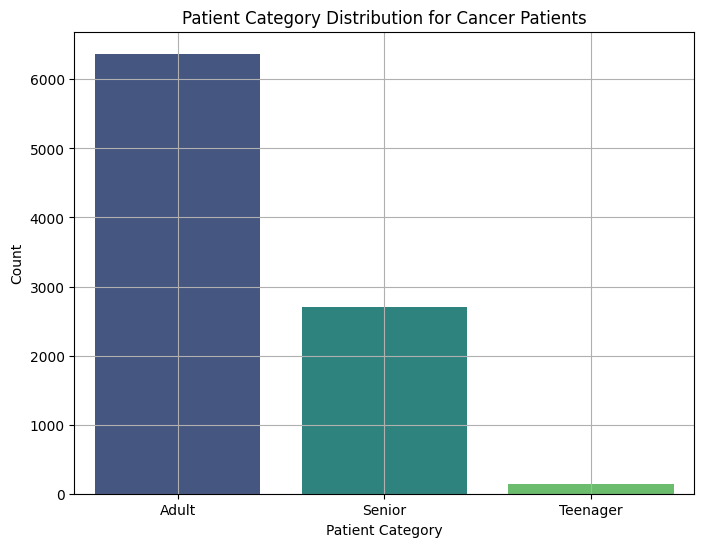

In [8]:
# Filter by medical condition 'Cancer'
Cancer_patients = df[df['Medical Condition'] == 'Cancer']

# Calculate proportion of seniors among obesity patients
seniors_with_Cancer = Cancer_patients[Cancer_patients['Patient Category'] == 'Senior']
probability_senior = len(seniors_with_Cancer) / len(Cancer_patients)
print(f"Likelihood of being 'Senior' among Cancer patients: {probability_senior:.2%}")

plt.figure(figsize=(8, 6))
sns.countplot(data=Cancer_patients, x='Patient Category', palette='viridis')
plt.title('Patient Category Distribution for Cancer Patients')
plt.xlabel('Patient Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
X = df[['Age']].values
y = df['Billing Amount'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict billing amount
predicted_billing = model.predict(X)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model coefficients: [-2.77809459]
Model intercept: 25682.497590508574


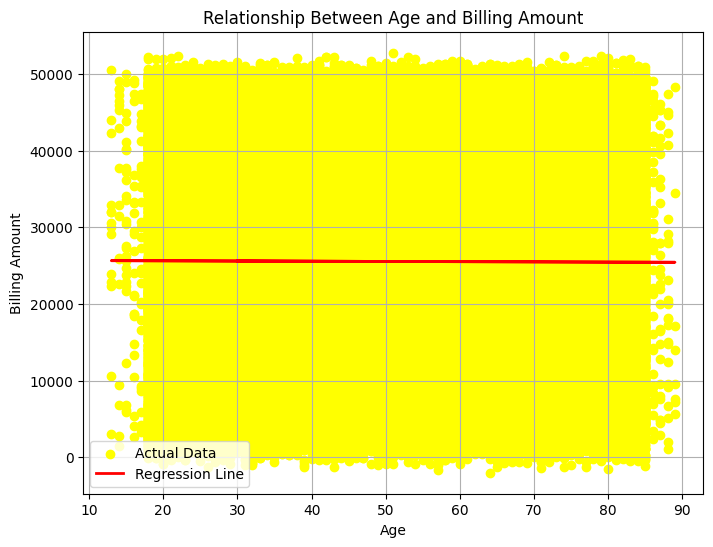

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Billing Amount'], color='yellow', label='Actual Data')
plt.plot(df['Age'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Relationship Between Age and Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target variable
X = df[['Age', 'Billing Amount', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type']]
y = df['Patient Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature importances
importances = model.feature_importances_
features = X.columns
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Age: 0.9959
Billing Amount: 0.0030
Blood Type: 0.0004
Medical Condition: 0.0004
Admission Type: 0.0002
Gender: 0.0001


C:\Users\Rahul\AppData\Local\Temp\ipykernel_21244\1672523813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f[1] for f in feature_importance], y=[f[0] for f in feature_importance], palette='viridis')


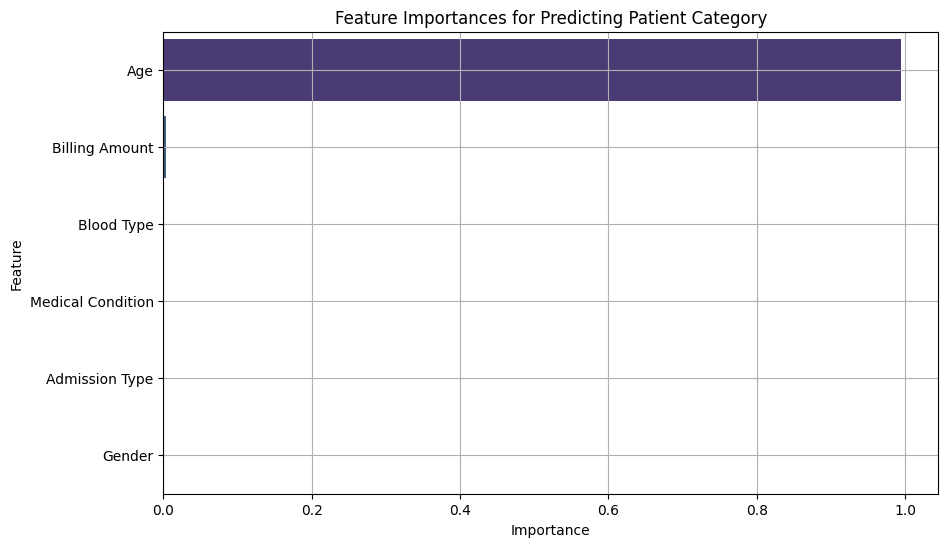

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[f[1] for f in feature_importance], y=[f[0] for f in feature_importance], palette='viridis')
plt.title('Feature Importances for Predicting Patient Category')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()